In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Link to download a subset of cats and dog dataset 
### https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [2]:
import os
import zipfile

local_ref = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_ref, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
base_dir = './cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[0:10])
print(train_dogs_fnames[0:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
print('total number of cats :', len(train_cats_fnames))
print('total number of dogs :', len(train_dogs_fnames))

total number of cats : 1000
total number of dogs : 1000


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

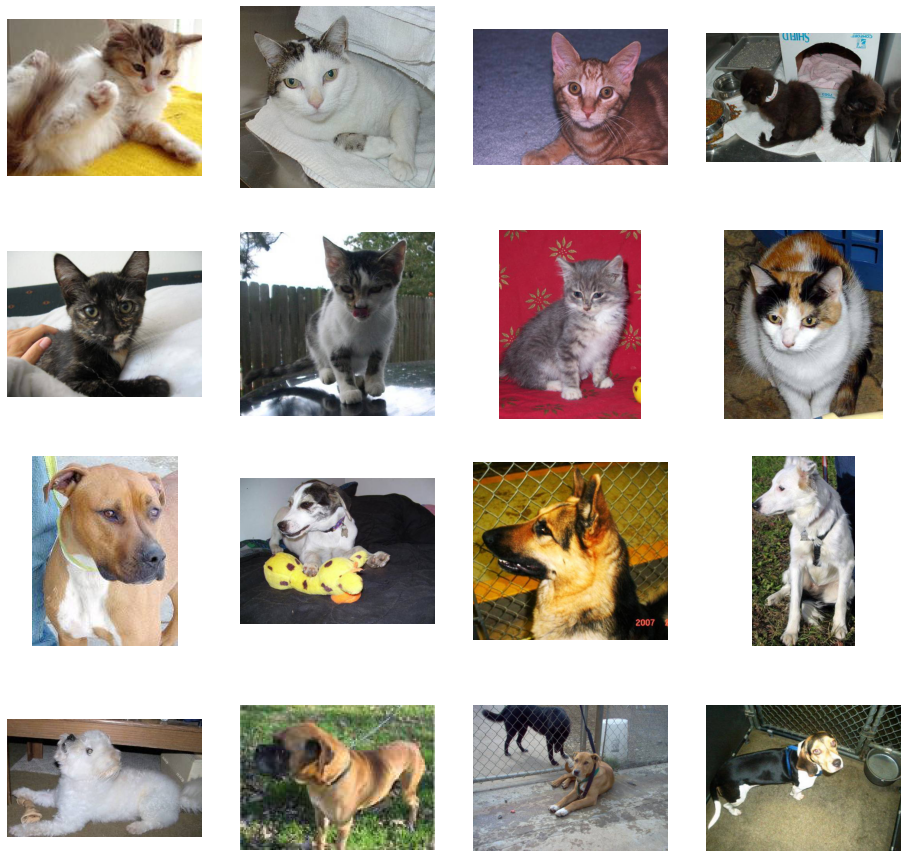

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index +=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
               for fname in train_cats_fnames[pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
               for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1.0/255.0)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size = 20,
                                                   class_mode = 'binary',
                                                   target_size = (150,150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                             batch_size = 20,
                                                             class_mode = 'binary',
                                                             target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit(train_generator,
                   validation_data = validation_generator,
                   steps_per_epoch = 100,
                   epochs =15,
                   validation_steps = 50,
                   verbose = 1)

Epoch 1/15
100/100 [==============================] - 39s 306ms/step - loss: 1.2169 - accuracy: 0.5465 - val_loss: 0.6501 - val_accuracy: 0.6230
Epoch 2/15
100/100 [==============================] - 9s 87ms/step - loss: 0.7540 - accuracy: 0.6155 - val_loss: 0.6544 - val_accuracy: 0.6360
Epoch 3/15
100/100 [==============================] - 11s 111ms/step - loss: 0.6549 - accuracy: 0.6565 - val_loss: 0.5888 - val_accuracy: 0.6890
Epoch 4/15
100/100 [==============================] - 9s 88ms/step - loss: 0.5784 - accuracy: 0.6915 - val_loss: 0.6470 - val_accuracy: 0.6070
Epoch 5/15
100/100 [==============================] - 9s 89ms/step - loss: 0.4986 - accuracy: 0.7660 - val_loss: 0.5401 - val_accuracy: 0.7410
Epoch 6/15
100/100 [==============================] - 9s 90ms/step - loss: 0.3903 - accuracy: 0.8255 - val_loss: 0.6161 - val_accuracy: 0.7160
Epoch 7/15
100/100 [==============================] - 9s 86ms/step - loss: 0.2810 - accuracy: 0.8780 - val_loss: 0.6081 - val_accuracy: 0.

In [21]:
import numpy as np
from keras.preprocessing import image
import os

images = os.listdir(r"C:\Users\Srishti\test1")



for i in images:
    print()
    #predicting images
    path = r"C:\Users\Srishti\test1/" + i
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(i + " is a dog")
    else:
        print(i + " is a cat")


[1.]
1.jpg is a dog

[1.]
10.jpg is a dog

[0.]
100.jpg is a cat

[1.]
1000.jpg is a dog

[1.]
10000.jpg is a dog

[1.]
10001.jpg is a dog

[0.]
10002.jpg is a cat

[1.]
10003.jpg is a dog

[1.]
10004.jpg is a dog

[0.]
10005.jpg is a cat

[1.]
10006.jpg is a dog

[0.]
10007.jpg is a cat

[0.]
10008.jpg is a cat

[0.]
10009.jpg is a cat

[1.]
1001.jpg is a dog

[1.]
10010.jpg is a dog

[1.]
10011.jpg is a dog

[0.]
10012.jpg is a cat

[1.]
10013.jpg is a dog

[1.]
10014.jpg is a dog

[1.]
10015.jpg is a dog

[1.]
10016.jpg is a dog

[0.]
10017.jpg is a cat

[0.]
10018.jpg is a cat

[0.]
10019.jpg is a cat

[0.]
1002.jpg is a cat

[0.]
10020.jpg is a cat

[0.]
10021.jpg is a cat

[1.]
10022.jpg is a dog

[1.]
10023.jpg is a dog

[1.]
10024.jpg is a dog

[1.]
10025.jpg is a dog

[0.]
10026.jpg is a cat

[1.]
10027.jpg is a dog

[0.]
10028.jpg is a cat

[1.]
10029.jpg is a dog

[1.]
1003.jpg is a dog

[1.]
10030.jpg is a dog

[1.]
10031.jpg is a dog

[1.]
10032.jpg is a dog

[0.]
10033.j

[1.]
10297.jpg is a dog

[1.]
10298.jpg is a dog

[1.]
10299.jpg is a dog

[0.]
103.jpg is a cat

[1.]
1030.jpg is a dog

[1.]
10300.jpg is a dog

[1.]
10301.jpg is a dog

[0.]
10302.jpg is a cat

[1.]
10303.jpg is a dog

[1.]
10304.jpg is a dog

[1.]
10305.jpg is a dog

[1.]
10306.jpg is a dog

[1.]
10307.jpg is a dog

[0.]
10308.jpg is a cat

[1.]
10309.jpg is a dog

[1.]
1031.jpg is a dog

[1.]
10310.jpg is a dog

[1.]
10311.jpg is a dog

[0.]
10312.jpg is a cat

[1.]
10313.jpg is a dog

[0.]
10314.jpg is a cat

[1.]
10315.jpg is a dog

[0.]
10316.jpg is a cat

[1.]
10317.jpg is a dog

[0.]
10318.jpg is a cat

[0.]
10319.jpg is a cat

[1.]
1032.jpg is a dog

[1.]
10320.jpg is a dog

[1.0984388e-10]
10321.jpg is a cat

[0.]
10322.jpg is a cat

[1.]
10323.jpg is a dog

[0.]
10324.jpg is a cat

[1.]
10325.jpg is a dog

[1.]
10326.jpg is a dog

[1.]
10327.jpg is a dog

[0.]
10328.jpg is a cat

[1.]
10329.jpg is a dog

[1.]
1033.jpg is a dog

[0.]
10330.jpg is a cat

[0.]
10331.jpg is a 

[1.]
10593.jpg is a dog

[1.]
10594.jpg is a dog

[1.]
10595.jpg is a dog

[1.]
10596.jpg is a dog

[0.]
10597.jpg is a cat

[1.]
10598.jpg is a dog

[1.]
10599.jpg is a dog

[1.]
106.jpg is a dog

[0.]
1060.jpg is a cat

[1.]
10600.jpg is a dog

[1.]
10601.jpg is a dog

[1.]
10602.jpg is a dog

[1.]
10603.jpg is a dog

[0.]
10604.jpg is a cat

[1.]
10605.jpg is a dog

[1.]
10606.jpg is a dog

[0.]
10607.jpg is a cat

[0.]
10608.jpg is a cat

[1.]
10609.jpg is a dog

[0.]
1061.jpg is a cat

[1.]
10610.jpg is a dog

[0.]
10611.jpg is a cat

[0.]
10612.jpg is a cat

[0.]
10613.jpg is a cat

[0.]
10614.jpg is a cat

[0.]
10615.jpg is a cat

[1.]
10616.jpg is a dog

[0.]
10617.jpg is a cat

[0.]
10618.jpg is a cat

[1.]
10619.jpg is a dog

[1.]
1062.jpg is a dog

[0.]
10620.jpg is a cat

[0.]
10621.jpg is a cat

[1.]
10622.jpg is a dog

[1.]
10623.jpg is a dog

[0.]
10624.jpg is a cat

[1.]
10625.jpg is a dog

[1.]
10626.jpg is a dog

[1.]
10627.jpg is a dog

[1.]
10628.jpg is a dog

[1.]


[0.]
10891.jpg is a cat

[1.]
10892.jpg is a dog

[0.]
10893.jpg is a cat

[1.]
10894.jpg is a dog

[1.]
10895.jpg is a dog

[1.]
10896.jpg is a dog

[1.]
10897.jpg is a dog

[1.]
10898.jpg is a dog

[1.]
10899.jpg is a dog

[1.]
109.jpg is a dog

[0.]
1090.jpg is a cat

[1.]
10900.jpg is a dog

[1.]
10901.jpg is a dog

[1.]
10902.jpg is a dog

[1.]
10903.jpg is a dog

[0.]
10904.jpg is a cat

[1.]
10905.jpg is a dog

[0.]
10906.jpg is a cat

[1.]
10907.jpg is a dog

[1.]
10908.jpg is a dog

[1.]
10909.jpg is a dog

[1.]
1091.jpg is a dog

[1.]
10910.jpg is a dog

[1.]
10911.jpg is a dog

[1.7362706e-36]
10912.jpg is a cat

[0.]
10913.jpg is a cat

[1.]
10914.jpg is a dog

[0.]
10915.jpg is a cat

[1.]
10916.jpg is a dog

[0.]
10917.jpg is a cat

[0.]
10918.jpg is a cat

[1.]
10919.jpg is a dog

[1.]
1092.jpg is a dog

[1.]
10920.jpg is a dog

[1.]
10921.jpg is a dog

[1.]
10922.jpg is a dog

[1.]
10923.jpg is a dog

[1.]
10924.jpg is a dog

[1.]
10925.jpg is a dog

[0.]
10926.jpg is a

[0.]
11188.jpg is a cat

[1.]
11189.jpg is a dog

[1.]
1119.jpg is a dog

[0.]
11190.jpg is a cat

[1.]
11191.jpg is a dog

[0.]
11192.jpg is a cat

[1.]
11193.jpg is a dog

[0.00236848]
11194.jpg is a cat

[4.9355624e-14]
11195.jpg is a cat

[0.]
11196.jpg is a cat

[0.]
11197.jpg is a cat

[1.]
11198.jpg is a dog

[0.]
11199.jpg is a cat

[0.]
112.jpg is a cat

[1.]
1120.jpg is a dog

[1.]
11200.jpg is a dog

[1.]
11201.jpg is a dog

[0.]
11202.jpg is a cat

[0.9793155]
11203.jpg is a dog

[1.]
11204.jpg is a dog

[0.]
11205.jpg is a cat

[0.]
11206.jpg is a cat

[1.]
11207.jpg is a dog

[0.]
11208.jpg is a cat

[0.]
11209.jpg is a cat

[1.]
1121.jpg is a dog

[1.]
11210.jpg is a dog

[1.]
11211.jpg is a dog

[1.]
11212.jpg is a dog

[0.]
11213.jpg is a cat

[0.]
11214.jpg is a cat

[0.]
11215.jpg is a cat

[1.]
11216.jpg is a dog

[1.]
11217.jpg is a dog

[0.]
11218.jpg is a cat

[0.]
11219.jpg is a cat

[1.]
1122.jpg is a dog

[1.]
11220.jpg is a dog

[1.]
11221.jpg is a dog

[1.]


[0.]
11485.jpg is a cat

[1.]
11486.jpg is a dog

[1.]
11487.jpg is a dog

[0.]
11488.jpg is a cat

[0.]
11489.jpg is a cat

[1.]
1149.jpg is a dog

[0.]
11490.jpg is a cat

[1.]
11491.jpg is a dog

[1.]
11492.jpg is a dog

[0.]
11493.jpg is a cat

[1.]
11494.jpg is a dog

[1.]
11495.jpg is a dog

[1.]
11496.jpg is a dog

[1.]
11497.jpg is a dog

[0.]
11498.jpg is a cat

[0.]
11499.jpg is a cat

[1.]
115.jpg is a dog

[0.]
1150.jpg is a cat

[1.0640957e-05]
11500.jpg is a cat

[1.]
11501.jpg is a dog

[2.0660754e-15]
11502.jpg is a cat

[1.]
11503.jpg is a dog

[0.]
11504.jpg is a cat

[0.]
11505.jpg is a cat

[1.]
11506.jpg is a dog

[0.]
11507.jpg is a cat

[0.]
11508.jpg is a cat

[0.]
11509.jpg is a cat

[1.]
1151.jpg is a dog

[1.]
11510.jpg is a dog

[0.]
11511.jpg is a cat

[1.]
11512.jpg is a dog

[1.]
11513.jpg is a dog

[1.]
11514.jpg is a dog

[1.]
11515.jpg is a dog

[1.]
11516.jpg is a dog

[1.]
11517.jpg is a dog

[1.]
11518.jpg is a dog

[1.]
11519.jpg is a dog

[0.]
115

[0.]
1178.jpg is a cat

[1.]
11780.jpg is a dog

[0.]
11781.jpg is a cat

[1.]
11782.jpg is a dog

[0.]
11783.jpg is a cat

[0.]
11784.jpg is a cat

[1.]
11785.jpg is a dog

[0.]
11786.jpg is a cat

[1.]
11787.jpg is a dog

[0.]
11788.jpg is a cat

[1.]
11789.jpg is a dog

[1.]
1179.jpg is a dog

[1.]
11790.jpg is a dog

[1.]
11791.jpg is a dog

[1.]
11792.jpg is a dog

[1.]
11793.jpg is a dog

[0.]
11794.jpg is a cat

[1.]
11795.jpg is a dog

[0.]
11796.jpg is a cat

[1.]
11797.jpg is a dog

[0.]
11798.jpg is a cat

[0.]
11799.jpg is a cat

[1.]
118.jpg is a dog

[1.]
1180.jpg is a dog

[0.]
11800.jpg is a cat

[1.]
11801.jpg is a dog

[0.]
11802.jpg is a cat

[0.]
11803.jpg is a cat

[1.]
11804.jpg is a dog

[1.]
11805.jpg is a dog

[1.]
11806.jpg is a dog

[1.]
11807.jpg is a dog

[0.]
11808.jpg is a cat

[1.]
11809.jpg is a dog

[1.]
1181.jpg is a dog

[1.]
11810.jpg is a dog

[0.]
11811.jpg is a cat

[1.]
11812.jpg is a dog

[0.]
11813.jpg is a cat

[1.]
11814.jpg is a dog

[0.]
1

[1.]
12078.jpg is a dog

[1.]
12079.jpg is a dog

[0.]
1208.jpg is a cat

[1.]
12080.jpg is a dog

[1.]
12081.jpg is a dog

[1.]
12082.jpg is a dog

[1.]
12083.jpg is a dog

[1.]
12084.jpg is a dog

[0.]
12085.jpg is a cat

[0.]
12086.jpg is a cat

[0.]
12087.jpg is a cat

[1.]
12088.jpg is a dog

[1.]
12089.jpg is a dog

[1.]
1209.jpg is a dog

[1.]
12090.jpg is a dog

[0.]
12091.jpg is a cat

[1.]
12092.jpg is a dog

[0.]
12093.jpg is a cat

[0.]
12094.jpg is a cat

[0.]
12095.jpg is a cat

[1.]
12096.jpg is a dog

[0.]
12097.jpg is a cat

[1.]
12098.jpg is a dog

[0.]
12099.jpg is a cat

[0.]
121.jpg is a cat

[1.]
1210.jpg is a dog

[1.]
12100.jpg is a dog

[0.]
12101.jpg is a cat

[0.]
12102.jpg is a cat

[0.]
12103.jpg is a cat

[1.]
12104.jpg is a dog

[0.]
12105.jpg is a cat

[0.]
12106.jpg is a cat

[1.]
12107.jpg is a dog

[0.]
12108.jpg is a cat

[1.]
12109.jpg is a dog

[1.]
1211.jpg is a dog

[1.]
12110.jpg is a dog

[0.]
12111.jpg is a cat

[1.]
12112.jpg is a dog

[1.]
1

[1.]
12373.jpg is a dog

[0.]
12374.jpg is a cat

[1.]
12375.jpg is a dog

[1.]
12376.jpg is a dog

[1.]
12377.jpg is a dog

[0.]
12378.jpg is a cat

[0.]
12379.jpg is a cat

[1.]
1238.jpg is a dog

[1.]
12380.jpg is a dog

[0.]
12381.jpg is a cat

[1.]
12382.jpg is a dog

[1.]
12383.jpg is a dog

[1.]
12384.jpg is a dog

[1.]
12385.jpg is a dog

[1.]
12386.jpg is a dog

[0.]
12387.jpg is a cat

[0.]
12388.jpg is a cat

[0.]
12389.jpg is a cat

[1.]
1239.jpg is a dog

[0.]
12390.jpg is a cat

[1.]
12391.jpg is a dog

[0.]
12392.jpg is a cat

[1.]
12393.jpg is a dog

[0.]
12394.jpg is a cat

[0.]
12395.jpg is a cat

[0.]
12396.jpg is a cat

[0.]
12397.jpg is a cat

[0.]
12398.jpg is a cat

[1.]
12399.jpg is a dog

[0.]
124.jpg is a cat

[1.]
1240.jpg is a dog

[1.]
12400.jpg is a dog

[0.]
12401.jpg is a cat

[0.]
12402.jpg is a cat

[1.]
12403.jpg is a dog

[0.]
12404.jpg is a cat

[0.]
12405.jpg is a cat

[0.]
12406.jpg is a cat

[1.]
12407.jpg is a dog

[1.]
12408.jpg is a dog

[1.]


[1.]
1427.jpg is a dog

[1.]
1428.jpg is a dog

[1.]
1429.jpg is a dog

[0.]
143.jpg is a cat

[1.]
1430.jpg is a dog

[1.]
1431.jpg is a dog

[1.]
1432.jpg is a dog

[1.]
1433.jpg is a dog

[0.]
1434.jpg is a cat

[1.]
1435.jpg is a dog

[1.]
1436.jpg is a dog

[1.]
1437.jpg is a dog

[0.]
1438.jpg is a cat

[1.]
1439.jpg is a dog

[0.]
144.jpg is a cat

[1.]
1440.jpg is a dog

[0.]
1441.jpg is a cat

[0.]
1442.jpg is a cat

[0.]
1443.jpg is a cat

[0.]
1444.jpg is a cat

[0.]
1445.jpg is a cat

[0.]
1446.jpg is a cat

[0.]
1447.jpg is a cat

[0.]
1448.jpg is a cat

[1.]
1449.jpg is a dog

[0.]
145.jpg is a cat

[1.]
1450.jpg is a dog

[0.]
1451.jpg is a cat

[1.]
1452.jpg is a dog

[1.]
1453.jpg is a dog

[1.]
1454.jpg is a dog

[1.]
1455.jpg is a dog

[1.]
1456.jpg is a dog

[1.]
1457.jpg is a dog

[1.]
1458.jpg is a dog

[0.]
1459.jpg is a cat

[1.]
146.jpg is a dog

[1.]
1460.jpg is a dog

[0.]
1461.jpg is a cat

[1.]
1462.jpg is a dog

[1.]
1463.jpg is a dog

[1.]
1464.jpg is a d

[1.]
1734.jpg is a dog

[0.]
1735.jpg is a cat

[1.]
1736.jpg is a dog

[1.]
1737.jpg is a dog

[0.]
1738.jpg is a cat

[0.]
1739.jpg is a cat

[1.]
174.jpg is a dog

[0.]
1740.jpg is a cat

[1.]
1741.jpg is a dog

[1.]
1742.jpg is a dog

[1.]
1743.jpg is a dog

[1.]
1744.jpg is a dog

[1.]
1745.jpg is a dog

[1.]
1746.jpg is a dog

[0.]
1747.jpg is a cat

[0.]
1748.jpg is a cat

[0.00036113]
1749.jpg is a cat

[1.]
175.jpg is a dog

[1.]
1750.jpg is a dog

[1.]
1751.jpg is a dog

[4.710555e-28]
1752.jpg is a cat

[1.]
1753.jpg is a dog

[1.]
1754.jpg is a dog

[1.]
1755.jpg is a dog

[0.]
1756.jpg is a cat

[0.]
1757.jpg is a cat

[0.]
1758.jpg is a cat

[1.]
1759.jpg is a dog

[1.]
176.jpg is a dog

[1.]
1760.jpg is a dog

[0.]
1761.jpg is a cat

[1.]
1762.jpg is a dog

[0.]
1763.jpg is a cat

[1.]
1764.jpg is a dog

[0.]
1765.jpg is a cat

[1.]
1766.jpg is a dog

[1.]
1767.jpg is a dog

[1.]
1768.jpg is a dog

[0.]
1769.jpg is a cat

[0.]
177.jpg is a cat

[1.]
1770.jpg is a dog

[0

[1.]
2040.jpg is a dog

[1.]
2041.jpg is a dog

[1.]
2042.jpg is a dog

[1.]
2043.jpg is a dog

[1.]
2044.jpg is a dog

[0.]
2045.jpg is a cat

[0.]
2046.jpg is a cat

[1.]
2047.jpg is a dog

[0.]
2048.jpg is a cat

[0.]
2049.jpg is a cat

[0.]
205.jpg is a cat

[1.]
2050.jpg is a dog

[0.]
2051.jpg is a cat

[1.]
2052.jpg is a dog

[1.]
2053.jpg is a dog

[0.]
2054.jpg is a cat

[1.]
2055.jpg is a dog

[1.]
2056.jpg is a dog

[1.]
2057.jpg is a dog

[0.]
2058.jpg is a cat

[2.3946401e-24]
2059.jpg is a cat

[0.]
206.jpg is a cat

[0.]
2060.jpg is a cat

[0.]
2061.jpg is a cat

[1.]
2062.jpg is a dog

[1.]
2063.jpg is a dog

[1.]
2064.jpg is a dog

[1.]
2065.jpg is a dog

[0.]
2066.jpg is a cat

[1.]
2067.jpg is a dog

[0.]
2068.jpg is a cat

[1.]
2069.jpg is a dog

[0.]
207.jpg is a cat

[1.]
2070.jpg is a dog

[1.]
2071.jpg is a dog

[1.]
2072.jpg is a dog

[1.]
2073.jpg is a dog

[2.921342e-25]
2074.jpg is a cat

[1.]
2075.jpg is a dog

[0.]
2076.jpg is a cat

[1.]
2077.jpg is a dog

[1.]
2347.jpg is a dog

[1.]
2348.jpg is a dog

[0.]
2349.jpg is a cat

[1.]
235.jpg is a dog

[1.]
2350.jpg is a dog

[1.]
2351.jpg is a dog

[1.]
2352.jpg is a dog

[0.]
2353.jpg is a cat

[0.]
2354.jpg is a cat

[1.]
2355.jpg is a dog

[0.]
2356.jpg is a cat

[1.]
2357.jpg is a dog

[1.]
2358.jpg is a dog

[0.]
2359.jpg is a cat

[1.]
236.jpg is a dog

[0.]
2360.jpg is a cat

[1.]
2361.jpg is a dog

[1.]
2362.jpg is a dog

[0.]
2363.jpg is a cat

[0.]
2364.jpg is a cat

[1.]
2365.jpg is a dog

[1.]
2366.jpg is a dog

[0.]
2367.jpg is a cat

[1.]
2368.jpg is a dog

[1.]
2369.jpg is a dog

[1.]
237.jpg is a dog

[1.]
2370.jpg is a dog

[0.]
2371.jpg is a cat

[0.]
2372.jpg is a cat

[1.]
2373.jpg is a dog

[1.]
2374.jpg is a dog

[1.]
2375.jpg is a dog

[1.]
2376.jpg is a dog

[1.]
2377.jpg is a dog

[1.]
2378.jpg is a dog

[1.]
2379.jpg is a dog

[0.]
238.jpg is a cat

[1.]
2380.jpg is a dog

[1.]
2381.jpg is a dog

[1.]
2382.jpg is a dog

[1.]
2383.jpg is a dog

[0.]
2384.jpg is a c

[0.]
2653.jpg is a cat

[0.]
2654.jpg is a cat

[1.]
2655.jpg is a dog

[1.]
2656.jpg is a dog

[1.]
2657.jpg is a dog

[1.]
2658.jpg is a dog

[0.]
2659.jpg is a cat

[0.]
266.jpg is a cat

[0.]
2660.jpg is a cat

[1.]
2661.jpg is a dog

[1.]
2662.jpg is a dog

[1.]
2663.jpg is a dog

[1.]
2664.jpg is a dog

[0.]
2665.jpg is a cat

[1.]
2666.jpg is a dog

[0.]
2667.jpg is a cat

[1.]
2668.jpg is a dog

[0.]
2669.jpg is a cat

[0.]
267.jpg is a cat

[1.]
2670.jpg is a dog

[0.]
2671.jpg is a cat

[0.]
2672.jpg is a cat

[1.]
2673.jpg is a dog

[0.]
2674.jpg is a cat

[2.8119473e-06]
2675.jpg is a cat

[0.]
2676.jpg is a cat

[1.]
2677.jpg is a dog

[1.]
2678.jpg is a dog

[0.]
2679.jpg is a cat

[0.]
268.jpg is a cat

[1.]
2680.jpg is a dog

[0.]
2681.jpg is a cat

[1.]
2682.jpg is a dog

[0.]
2683.jpg is a cat

[1.]
2684.jpg is a dog

[0.]
2685.jpg is a cat

[1.]
2686.jpg is a dog

[0.]
2687.jpg is a cat

[0.]
2688.jpg is a cat

[1.]
2689.jpg is a dog

[1.]
269.jpg is a dog

[1.]
2690

[0.]
2963.jpg is a cat

[1.]
2964.jpg is a dog

[0.]
2965.jpg is a cat

[0.]
2966.jpg is a cat

[1.]
2967.jpg is a dog

[0.]
2968.jpg is a cat

[1.]
2969.jpg is a dog

[1.]
297.jpg is a dog

[1.]
2970.jpg is a dog

[0.]
2971.jpg is a cat

[1.]
2972.jpg is a dog

[1.]
2973.jpg is a dog

[1.]
2974.jpg is a dog

[1.]
2975.jpg is a dog

[0.]
2976.jpg is a cat

[1.]
2977.jpg is a dog

[1.]
2978.jpg is a dog

[1.]
2979.jpg is a dog

[1.]
298.jpg is a dog

[1.]
2980.jpg is a dog

[1.]
2981.jpg is a dog

[1.]
2982.jpg is a dog

[6.809912e-18]
2983.jpg is a cat

[1.]
2984.jpg is a dog

[1.]
2985.jpg is a dog

[1.]
2986.jpg is a dog

[1.]
2987.jpg is a dog

[1.]
2988.jpg is a dog

[8.667682e-26]
2989.jpg is a cat

[1.]
299.jpg is a dog

[1.]
2990.jpg is a dog

[0.]
2991.jpg is a cat

[1.]
2992.jpg is a dog

[0.]
2993.jpg is a cat

[0.9999999]
2994.jpg is a dog

[1.]
2995.jpg is a dog

[1.]
2996.jpg is a dog

[1.]
2997.jpg is a dog

[0.]
2998.jpg is a cat

[0.]
2999.jpg is a cat

[1.]
3.jpg is a 

[1.]
3270.jpg is a dog

[0.]
3271.jpg is a cat

[1.]
3272.jpg is a dog

[1.]
3273.jpg is a dog

[1.]
3274.jpg is a dog

[0.]
3275.jpg is a cat

[1.]
3276.jpg is a dog

[1.]
3277.jpg is a dog

[1.]
3278.jpg is a dog

[1.]
3279.jpg is a dog

[0.]
328.jpg is a cat

[1.]
3280.jpg is a dog

[0.]
3281.jpg is a cat

[1.]
3282.jpg is a dog

[0.]
3283.jpg is a cat

[1.]
3284.jpg is a dog

[0.]
3285.jpg is a cat

[0.]
3286.jpg is a cat

[1.]
3287.jpg is a dog

[1.]
3288.jpg is a dog

[0.]
3289.jpg is a cat

[0.]
329.jpg is a cat

[0.]
3290.jpg is a cat

[1.]
3291.jpg is a dog

[0.]
3292.jpg is a cat

[1.]
3293.jpg is a dog

[1.]
3294.jpg is a dog

[0.]
3295.jpg is a cat

[0.]
3296.jpg is a cat

[0.]
3297.jpg is a cat

[1.]
3298.jpg is a dog

[1.]
3299.jpg is a dog

[0.]
33.jpg is a cat

[0.]
330.jpg is a cat

[0.]
3300.jpg is a cat

[1.]
3301.jpg is a dog

[1.]
3302.jpg is a dog

[1.]
3303.jpg is a dog

[0.]
3304.jpg is a cat

[0.]
3305.jpg is a cat

[1.]
3306.jpg is a dog

[0.]
3307.jpg is a ca

[1.]
3579.jpg is a dog

[1.]
358.jpg is a dog

[1.]
3580.jpg is a dog

[0.]
3581.jpg is a cat

[1.]
3582.jpg is a dog

[0.]
3583.jpg is a cat

[1.]
3584.jpg is a dog

[1.]
3585.jpg is a dog

[0.]
3586.jpg is a cat

[1.]
3587.jpg is a dog

[0.]
3588.jpg is a cat

[1.]
3589.jpg is a dog

[0.]
359.jpg is a cat

[1.]
3590.jpg is a dog

[1.]
3591.jpg is a dog

[1.]
3592.jpg is a dog

[1.]
3593.jpg is a dog

[1.]
3594.jpg is a dog

[1.]
3595.jpg is a dog

[1.]
3596.jpg is a dog

[0.]
3597.jpg is a cat

[1.]
3598.jpg is a dog

[1.]
3599.jpg is a dog

[1.]
36.jpg is a dog

[1.]
360.jpg is a dog

[0.]
3600.jpg is a cat

[1.]
3601.jpg is a dog

[0.]
3602.jpg is a cat

[0.]
3603.jpg is a cat

[0.]
3604.jpg is a cat

[1.]
3605.jpg is a dog

[1.]
3606.jpg is a dog

[1.]
3607.jpg is a dog

[1.]
3608.jpg is a dog

[0.]
3609.jpg is a cat

[0.]
361.jpg is a cat

[1.]
3610.jpg is a dog

[1.]
3611.jpg is a dog

[1.]
3612.jpg is a dog

[1.]
3613.jpg is a dog

[0.]
3614.jpg is a cat

[1.]
3615.jpg is a dog

[1.]
389.jpg is a dog

[1.]
3890.jpg is a dog

[1.]
3891.jpg is a dog

[1.]
3892.jpg is a dog

[0.]
3893.jpg is a cat

[1.]
3894.jpg is a dog

[0.]
3895.jpg is a cat

[1.]
3896.jpg is a dog

[0.]
3897.jpg is a cat

[1.]
3898.jpg is a dog

[1.]
3899.jpg is a dog

[1.]
39.jpg is a dog

[0.]
390.jpg is a cat

[1.]
3900.jpg is a dog

[0.]
3901.jpg is a cat

[1.]
3902.jpg is a dog

[0.]
3903.jpg is a cat

[1.]
3904.jpg is a dog

[0.]
3905.jpg is a cat

[1.]
3906.jpg is a dog

[1.]
3907.jpg is a dog

[1.]
3908.jpg is a dog

[1.]
3909.jpg is a dog

[1.]
391.jpg is a dog

[0.]
3910.jpg is a cat

[1.]
3911.jpg is a dog

[1.]
3912.jpg is a dog

[1.]
3913.jpg is a dog

[1.]
3914.jpg is a dog

[1.]
3915.jpg is a dog

[1.]
3916.jpg is a dog

[1.]
3917.jpg is a dog

[1.]
3918.jpg is a dog

[1.]
3919.jpg is a dog

[1.]
392.jpg is a dog

[0.]
3920.jpg is a cat

[1.]
3921.jpg is a dog

[1.]
3922.jpg is a dog

[1.]
3923.jpg is a dog

[1.]
3924.jpg is a dog

[1.]
3925.jpg is a dog

[1.]
3926.jpg is a dog

[1.]
42.jpg is a dog

[1.]
420.jpg is a dog

[1.]
4200.jpg is a dog

[0.]
4201.jpg is a cat

[1.]
4202.jpg is a dog

[1.]
4203.jpg is a dog

[1.]
4204.jpg is a dog

[0.]
4205.jpg is a cat

[0.]
4206.jpg is a cat

[1.]
4207.jpg is a dog

[1.]
4208.jpg is a dog

[0.]
4209.jpg is a cat

[1.]
421.jpg is a dog

[1.]
4210.jpg is a dog

[1.]
4211.jpg is a dog

[0.997775]
4212.jpg is a dog

[0.]
4213.jpg is a cat

[1.]
4214.jpg is a dog

[1.]
4215.jpg is a dog

[1.]
4216.jpg is a dog

[0.]
4217.jpg is a cat

[1.]
4218.jpg is a dog

[1.]
4219.jpg is a dog

[1.]
422.jpg is a dog

[0.9985676]
4220.jpg is a dog

[1.]
4221.jpg is a dog

[0.]
4222.jpg is a cat

[0.]
4223.jpg is a cat

[0.]
4224.jpg is a cat

[1.]
4225.jpg is a dog

[0.]
4226.jpg is a cat

[1.]
4227.jpg is a dog

[0.]
4228.jpg is a cat

[0.]
4229.jpg is a cat

[1.]
423.jpg is a dog

[1.]
4230.jpg is a dog

[0.]
4231.jpg is a cat

[0.]
4232.jpg is a cat

[0.]
4233.jpg is a cat

[0.]
4234.jpg is a cat

[1.]
4235.jpg is a dog

[0.]
4236

[1.]
4508.jpg is a dog

[0.]
4509.jpg is a cat

[0.]
451.jpg is a cat

[1.]
4510.jpg is a dog

[1.]
4511.jpg is a dog

[0.]
4512.jpg is a cat

[1.]
4513.jpg is a dog

[0.]
4514.jpg is a cat

[1.]
4515.jpg is a dog

[1.]
4516.jpg is a dog

[0.]
4517.jpg is a cat

[1.]
4518.jpg is a dog

[0.]
4519.jpg is a cat

[1.]
452.jpg is a dog

[1.]
4520.jpg is a dog

[1.]
4521.jpg is a dog

[0.]
4522.jpg is a cat

[1.]
4523.jpg is a dog

[0.]
4524.jpg is a cat

[0.]
4525.jpg is a cat

[1.]
4526.jpg is a dog

[1.]
4527.jpg is a dog

[0.]
4528.jpg is a cat

[1.]
4529.jpg is a dog

[1.]
453.jpg is a dog

[1.]
4530.jpg is a dog

[1.]
4531.jpg is a dog

[0.]
4532.jpg is a cat

[1.]
4533.jpg is a dog

[1.]
4534.jpg is a dog

[1.]
4535.jpg is a dog

[0.]
4536.jpg is a cat

[1.]
4537.jpg is a dog

[0.]
4538.jpg is a cat

[1.]
4539.jpg is a dog

[1.]
454.jpg is a dog

[0.]
4540.jpg is a cat

[1.]
4541.jpg is a dog

[0.]
4542.jpg is a cat

[0.9998456]
4543.jpg is a dog

[0.]
4544.jpg is a cat

[1.]
4545.jpg

[1.]
4817.jpg is a dog

[1.]
4818.jpg is a dog

[0.]
4819.jpg is a cat

[1.]
482.jpg is a dog

[1.]
4820.jpg is a dog

[1.]
4821.jpg is a dog

[1.]
4822.jpg is a dog

[1.]
4823.jpg is a dog

[1.]
4824.jpg is a dog

[1.]
4825.jpg is a dog

[1.]
4826.jpg is a dog

[0.]
4827.jpg is a cat

[1.]
4828.jpg is a dog

[1.]
4829.jpg is a dog

[1.]
483.jpg is a dog

[0.]
4830.jpg is a cat

[0.]
4831.jpg is a cat

[1.]
4832.jpg is a dog

[1.]
4833.jpg is a dog

[1.]
4834.jpg is a dog

[1.]
4835.jpg is a dog

[1.]
4836.jpg is a dog

[0.]
4837.jpg is a cat

[0.]
4838.jpg is a cat

[0.]
4839.jpg is a cat

[0.]
484.jpg is a cat

[1.]
4840.jpg is a dog

[1.]
4841.jpg is a dog

[0.]
4842.jpg is a cat

[1.]
4843.jpg is a dog

[0.]
4844.jpg is a cat

[1.]
4845.jpg is a dog

[0.]
4846.jpg is a cat

[0.]
4847.jpg is a cat

[0.]
4848.jpg is a cat

[1.]
4849.jpg is a dog

[1.]
485.jpg is a dog

[0.]
4850.jpg is a cat

[0.]
4851.jpg is a cat

[1.]
4852.jpg is a dog

[0.]
4853.jpg is a cat

[1.]
4854.jpg is a d

[1.]
5127.jpg is a dog

[1.]
5128.jpg is a dog

[1.]
5129.jpg is a dog

[1.]
513.jpg is a dog

[1.]
5130.jpg is a dog

[1.]
5131.jpg is a dog

[0.]
5132.jpg is a cat

[0.]
5133.jpg is a cat

[0.]
5134.jpg is a cat

[0.]
5135.jpg is a cat

[1.]
5136.jpg is a dog

[0.]
5137.jpg is a cat

[0.]
5138.jpg is a cat

[0.]
5139.jpg is a cat

[1.]
514.jpg is a dog

[0.]
5140.jpg is a cat

[1.]
5141.jpg is a dog

[1.]
5142.jpg is a dog

[1.]
5143.jpg is a dog

[1.]
5144.jpg is a dog

[1.]
5145.jpg is a dog

[1.]
5146.jpg is a dog

[1.]
5147.jpg is a dog

[1.]
5148.jpg is a dog

[0.]
5149.jpg is a cat

[1.]
515.jpg is a dog

[1.]
5150.jpg is a dog

[0.]
5151.jpg is a cat

[0.]
5152.jpg is a cat

[1.]
5153.jpg is a dog

[0.]
5154.jpg is a cat

[1.]
5155.jpg is a dog

[1.]
5156.jpg is a dog

[1.]
5157.jpg is a dog

[0.]
5158.jpg is a cat

[1.]
5159.jpg is a dog

[1.]
516.jpg is a dog

[1.]
5160.jpg is a dog

[0.]
5161.jpg is a cat

[1.]
5162.jpg is a dog

[1.]
5163.jpg is a dog

[1.]
5164.jpg is a d

[1.]
5437.jpg is a dog

[2.0421548e-28]
5438.jpg is a cat

[1.]
5439.jpg is a dog

[1.]
544.jpg is a dog

[1.]
5440.jpg is a dog

[1.]
5441.jpg is a dog

[1.]
5442.jpg is a dog

[1.]
5443.jpg is a dog

[1.]
5444.jpg is a dog

[1.]
5445.jpg is a dog

[1.]
5446.jpg is a dog

[0.]
5447.jpg is a cat

[1.]
5448.jpg is a dog

[1.]
5449.jpg is a dog

[1.]
545.jpg is a dog

[1.]
5450.jpg is a dog

[1.]
5451.jpg is a dog

[0.]
5452.jpg is a cat

[0.]
5453.jpg is a cat

[0.]
5454.jpg is a cat

[1.]
5455.jpg is a dog

[1.]
5456.jpg is a dog

[0.]
5457.jpg is a cat

[0.]
5458.jpg is a cat

[1.]
5459.jpg is a dog

[0.]
546.jpg is a cat

[1.]
5460.jpg is a dog

[0.]
5461.jpg is a cat

[1.]
5462.jpg is a dog

[1.]
5463.jpg is a dog

[1.]
5464.jpg is a dog

[1.]
5465.jpg is a dog

[1.]
5466.jpg is a dog

[1.]
5467.jpg is a dog

[1.]
5468.jpg is a dog

[1.]
5469.jpg is a dog

[1.]
547.jpg is a dog

[1.]
5470.jpg is a dog

[1.]
5471.jpg is a dog

[1.]
5472.jpg is a dog

[1.]
5473.jpg is a dog

[0.]
5474

[0.]
5747.jpg is a cat

[1.]
5748.jpg is a dog

[1.]
5749.jpg is a dog

[1.]
575.jpg is a dog

[0.]
5750.jpg is a cat

[1.]
5751.jpg is a dog

[1.]
5752.jpg is a dog

[1.]
5753.jpg is a dog

[1.]
5754.jpg is a dog

[0.]
5755.jpg is a cat

[1.]
5756.jpg is a dog

[0.]
5757.jpg is a cat

[1.]
5758.jpg is a dog

[1.]
5759.jpg is a dog

[0.]
576.jpg is a cat

[1.]
5760.jpg is a dog

[8.783415e-18]
5761.jpg is a cat

[0.]
5762.jpg is a cat

[0.]
5763.jpg is a cat

[0.]
5764.jpg is a cat

[1.]
5765.jpg is a dog

[0.]
5766.jpg is a cat

[1.]
5767.jpg is a dog

[1.]
5768.jpg is a dog

[0.]
5769.jpg is a cat

[1.]
577.jpg is a dog

[2.9166364e-22]
5770.jpg is a cat

[1.]
5771.jpg is a dog

[1.]
5772.jpg is a dog

[0.]
5773.jpg is a cat

[1.]
5774.jpg is a dog

[1.]
5775.jpg is a dog

[1.]
5776.jpg is a dog

[0.]
5777.jpg is a cat

[1.]
5778.jpg is a dog

[1.]
5779.jpg is a dog

[0.]
578.jpg is a cat

[0.]
5780.jpg is a cat

[0.]
5781.jpg is a cat

[1.]
5782.jpg is a dog

[0.]
5783.jpg is a cat


[0.]
6057.jpg is a cat

[1.]
6058.jpg is a dog

[1.]
6059.jpg is a dog

[0.]
606.jpg is a cat

[1.]
6060.jpg is a dog

[1.]
6061.jpg is a dog

[1.]
6062.jpg is a dog

[0.]
6063.jpg is a cat

[1.]
6064.jpg is a dog

[0.]
6065.jpg is a cat

[0.]
6066.jpg is a cat

[1.]
6067.jpg is a dog

[1.]
6068.jpg is a dog

[2.7645903e-28]
6069.jpg is a cat

[1.]
607.jpg is a dog

[1.]
6070.jpg is a dog

[1.]
6071.jpg is a dog

[1.]
6072.jpg is a dog

[1.]
6073.jpg is a dog

[1.]
6074.jpg is a dog

[0.]
6075.jpg is a cat

[1.]
6076.jpg is a dog

[0.]
6077.jpg is a cat

[1.]
6078.jpg is a dog

[1.]
6079.jpg is a dog

[1.]
608.jpg is a dog

[1.]
6080.jpg is a dog

[0.]
6081.jpg is a cat

[1.]
6082.jpg is a dog

[1.]
6083.jpg is a dog

[1.]
6084.jpg is a dog

[1.]
6085.jpg is a dog

[1.]
6086.jpg is a dog

[1.]
6087.jpg is a dog

[1.]
6088.jpg is a dog

[1.]
6089.jpg is a dog

[0.]
609.jpg is a cat

[1.]
6090.jpg is a dog

[0.]
6091.jpg is a cat

[1.]
6092.jpg is a dog

[0.]
6093.jpg is a cat

[1.]
6094

[0.]
6362.jpg is a cat

[0.]
6363.jpg is a cat

[1.]
6364.jpg is a dog

[1.]
6365.jpg is a dog

[1.]
6366.jpg is a dog

[0.]
6367.jpg is a cat

[1.]
6368.jpg is a dog

[0.]
6369.jpg is a cat

[0.]
637.jpg is a cat

[0.]
6370.jpg is a cat

[1.]
6371.jpg is a dog

[0.]
6372.jpg is a cat

[1.]
6373.jpg is a dog

[1.]
6374.jpg is a dog

[1.]
6375.jpg is a dog

[1.1407056e-19]
6376.jpg is a cat

[1.]
6377.jpg is a dog

[0.]
6378.jpg is a cat

[1.]
6379.jpg is a dog

[1.]
638.jpg is a dog

[0.]
6380.jpg is a cat

[1.]
6381.jpg is a dog

[0.]
6382.jpg is a cat

[0.]
6383.jpg is a cat

[1.]
6384.jpg is a dog

[1.]
6385.jpg is a dog

[0.]
6386.jpg is a cat

[1.]
6387.jpg is a dog

[0.]
6388.jpg is a cat

[1.]
6389.jpg is a dog

[1.]
639.jpg is a dog

[0.]
6390.jpg is a cat

[1.]
6391.jpg is a dog

[0.]
6392.jpg is a cat

[1.]
6393.jpg is a dog

[0.]
6394.jpg is a cat

[0.]
6395.jpg is a cat

[0.]
6396.jpg is a cat

[1.]
6397.jpg is a dog

[1.]
6398.jpg is a dog

[1.]
6399.jpg is a dog

[1.]
64.

[1.]
6671.jpg is a dog

[1.]
6672.jpg is a dog

[0.]
6673.jpg is a cat

[1.]
6674.jpg is a dog

[0.]
6675.jpg is a cat

[1.]
6676.jpg is a dog

[0.]
6677.jpg is a cat

[0.]
6678.jpg is a cat

[1.]
6679.jpg is a dog

[0.]
668.jpg is a cat

[1.]
6680.jpg is a dog

[1.]
6681.jpg is a dog

[0.]
6682.jpg is a cat

[0.]
6683.jpg is a cat

[0.]
6684.jpg is a cat

[1.]
6685.jpg is a dog

[1.]
6686.jpg is a dog

[0.]
6687.jpg is a cat

[1.]
6688.jpg is a dog

[0.]
6689.jpg is a cat

[1.]
669.jpg is a dog

[1.]
6690.jpg is a dog

[0.]
6691.jpg is a cat

[0.]
6692.jpg is a cat

[1.]
6693.jpg is a dog

[0.]
6694.jpg is a cat

[1.]
6695.jpg is a dog

[1.]
6696.jpg is a dog

[0.]
6697.jpg is a cat

[1.]
6698.jpg is a dog

[0.]
6699.jpg is a cat

[1.11977575e-23]
67.jpg is a cat

[0.]
670.jpg is a cat

[1.]
6700.jpg is a dog

[0.]
6701.jpg is a cat

[1.]
6702.jpg is a dog

[1.]
6703.jpg is a dog

[1.]
6704.jpg is a dog

[0.]
6705.jpg is a cat

[0.]
6706.jpg is a cat

[1.]
6707.jpg is a dog

[0.]
6708

[0.]
698.jpg is a cat

[1.]
6980.jpg is a dog

[0.]
6981.jpg is a cat

[1.]
6982.jpg is a dog

[0.]
6983.jpg is a cat

[1.]
6984.jpg is a dog

[1.]
6985.jpg is a dog

[1.]
6986.jpg is a dog

[1.]
6987.jpg is a dog

[1.]
6988.jpg is a dog

[1.]
6989.jpg is a dog

[0.]
699.jpg is a cat

[0.]
6990.jpg is a cat

[0.]
6991.jpg is a cat

[1.]
6992.jpg is a dog

[1.]
6993.jpg is a dog

[0.]
6994.jpg is a cat

[0.]
6995.jpg is a cat

[1.]
6996.jpg is a dog

[1.]
6997.jpg is a dog

[1.]
6998.jpg is a dog

[1.]
6999.jpg is a dog

[0.]
7.jpg is a cat

[1.]
70.jpg is a dog

[0.]
700.jpg is a cat

[1.]
7000.jpg is a dog

[1.]
7001.jpg is a dog

[1.]
7002.jpg is a dog

[0.]
7003.jpg is a cat

[1.]
7004.jpg is a dog

[0.]
7005.jpg is a cat

[1.]
7006.jpg is a dog

[0.]
7007.jpg is a cat

[1.]
7008.jpg is a dog

[0.]
7009.jpg is a cat

[1.]
701.jpg is a dog

[1.]
7010.jpg is a dog

[0.]
7011.jpg is a cat

[0.]
7012.jpg is a cat

[1.]
7013.jpg is a dog

[5.054064e-09]
7014.jpg is a cat

[0.]
7015.jpg i

[1.]
7286.jpg is a dog

[1.]
7287.jpg is a dog

[0.]
7288.jpg is a cat

[1.]
7289.jpg is a dog

[0.]
729.jpg is a cat

[1.]
7290.jpg is a dog

[0.]
7291.jpg is a cat

[1.]
7292.jpg is a dog

[1.]
7293.jpg is a dog

[1.]
7294.jpg is a dog

[1.]
7295.jpg is a dog

[1.]
7296.jpg is a dog

[0.]
7297.jpg is a cat

[1.]
7298.jpg is a dog

[1.]
7299.jpg is a dog

[1.]
73.jpg is a dog

[1.]
730.jpg is a dog

[1.]
7300.jpg is a dog

[0.]
7301.jpg is a cat

[0.]
7302.jpg is a cat

[0.]
7303.jpg is a cat

[1.]
7304.jpg is a dog

[1.]
7305.jpg is a dog

[1.]
7306.jpg is a dog

[1.]
7307.jpg is a dog

[1.]
7308.jpg is a dog

[1.]
7309.jpg is a dog

[1.]
731.jpg is a dog

[0.]
7310.jpg is a cat

[0.]
7311.jpg is a cat

[1.]
7312.jpg is a dog

[0.]
7313.jpg is a cat

[0.]
7314.jpg is a cat

[1.]
7315.jpg is a dog

[1.]
7316.jpg is a dog

[0.]
7317.jpg is a cat

[1.]
7318.jpg is a dog

[1.]
7319.jpg is a dog

[0.]
732.jpg is a cat

[1.]
7320.jpg is a dog

[1.]
7321.jpg is a dog

[0.]
7322.jpg is a cat

[0.]
7593.jpg is a cat

[1.]
7594.jpg is a dog

[1.]
7595.jpg is a dog

[1.]
7596.jpg is a dog

[0.]
7597.jpg is a cat

[1.]
7598.jpg is a dog

[0.]
7599.jpg is a cat

[1.]
76.jpg is a dog

[0.]
760.jpg is a cat

[0.]
7600.jpg is a cat

[1.]
7601.jpg is a dog

[1.]
7602.jpg is a dog

[1.]
7603.jpg is a dog

[0.]
7604.jpg is a cat

[1.]
7605.jpg is a dog

[0.]
7606.jpg is a cat

[0.]
7607.jpg is a cat

[1.]
7608.jpg is a dog

[1.]
7609.jpg is a dog

[1.]
761.jpg is a dog

[0.]
7610.jpg is a cat

[1.]
7611.jpg is a dog

[1.]
7612.jpg is a dog

[1.]
7613.jpg is a dog

[0.]
7614.jpg is a cat

[1.]
7615.jpg is a dog

[1.]
7616.jpg is a dog

[0.]
7617.jpg is a cat

[0.]
7618.jpg is a cat

[0.]
7619.jpg is a cat

[0.]
762.jpg is a cat

[1.]
7620.jpg is a dog

[0.]
7621.jpg is a cat

[1.]
7622.jpg is a dog

[1.]
7623.jpg is a dog

[0.]
7624.jpg is a cat

[1.]
7625.jpg is a dog

[1.]
7626.jpg is a dog

[1.]
7627.jpg is a dog

[1.]
7628.jpg is a dog

[0.]
7629.jpg is a cat

[0.]
763.jpg is a cat

[1.]
7902.jpg is a dog

[1.]
7903.jpg is a dog

[1.]
7904.jpg is a dog

[1.]
7905.jpg is a dog

[1.]
7906.jpg is a dog

[1.]
7907.jpg is a dog

[0.]
7908.jpg is a cat

[1.]
7909.jpg is a dog

[1.]
791.jpg is a dog

[0.]
7910.jpg is a cat

[1.]
7911.jpg is a dog

[1.]
7912.jpg is a dog

[1.]
7913.jpg is a dog

[1.]
7914.jpg is a dog

[5.908222e-07]
7915.jpg is a cat

[1.]
7916.jpg is a dog

[0.]
7917.jpg is a cat

[1.]
7918.jpg is a dog

[1.]
7919.jpg is a dog

[1.]
792.jpg is a dog

[1.]
7920.jpg is a dog

[1.]
7921.jpg is a dog

[1.]
7922.jpg is a dog

[0.]
7923.jpg is a cat

[1.]
7924.jpg is a dog

[1.]
7925.jpg is a dog

[0.]
7926.jpg is a cat

[1.]
7927.jpg is a dog

[1.]
7928.jpg is a dog

[1.]
7929.jpg is a dog

[0.]
793.jpg is a cat

[1.]
7930.jpg is a dog

[1.]
7931.jpg is a dog

[1.]
7932.jpg is a dog

[1.]
7933.jpg is a dog

[1.]
7934.jpg is a dog

[1.]
7935.jpg is a dog

[1.]
7936.jpg is a dog

[1.]
7937.jpg is a dog

[1.]
7938.jpg is a dog

[0.]
7939.jpg is a cat

[0.]
794.

[0.]
8210.jpg is a cat

[0.]
8211.jpg is a cat

[1.]
8212.jpg is a dog

[0.]
8213.jpg is a cat

[0.]
8214.jpg is a cat

[0.]
8215.jpg is a cat

[1.]
8216.jpg is a dog

[1.]
8217.jpg is a dog

[0.]
8218.jpg is a cat

[1.]
8219.jpg is a dog

[1.]
822.jpg is a dog

[1.]
8220.jpg is a dog

[1.]
8221.jpg is a dog

[1.]
8222.jpg is a dog

[1.]
8223.jpg is a dog

[1.]
8224.jpg is a dog

[0.]
8225.jpg is a cat

[0.]
8226.jpg is a cat

[0.]
8227.jpg is a cat

[1.]
8228.jpg is a dog

[1.]
8229.jpg is a dog

[1.]
823.jpg is a dog

[1.]
8230.jpg is a dog

[1.]
8231.jpg is a dog

[1.]
8232.jpg is a dog

[1.]
8233.jpg is a dog

[0.]
8234.jpg is a cat

[1.]
8235.jpg is a dog

[0.]
8236.jpg is a cat

[1.]
8237.jpg is a dog

[1.]
8238.jpg is a dog

[0.]
8239.jpg is a cat

[0.]
824.jpg is a cat

[1.]
8240.jpg is a dog

[1.]
8241.jpg is a dog

[1.]
8242.jpg is a dog

[0.]
8243.jpg is a cat

[1.]
8244.jpg is a dog

[0.]
8245.jpg is a cat

[1.]
8246.jpg is a dog

[0.]
8247.jpg is a cat

[1.]
8248.jpg is a 

[0.]
852.jpg is a cat

[0.]
8520.jpg is a cat

[1.]
8521.jpg is a dog

[0.]
8522.jpg is a cat

[1.]
8523.jpg is a dog

[1.]
8524.jpg is a dog

[0.]
8525.jpg is a cat

[1.]
8526.jpg is a dog

[0.]
8527.jpg is a cat

[1.]
8528.jpg is a dog

[1.]
8529.jpg is a dog

[1.]
853.jpg is a dog

[1.]
8530.jpg is a dog

[1.]
8531.jpg is a dog

[1.]
8532.jpg is a dog

[1.]
8533.jpg is a dog

[1.]
8534.jpg is a dog

[0.]
8535.jpg is a cat

[0.]
8536.jpg is a cat

[0.]
8537.jpg is a cat

[0.]
8538.jpg is a cat

[1.]
8539.jpg is a dog

[1.]
854.jpg is a dog

[0.]
8540.jpg is a cat

[1.]
8541.jpg is a dog

[0.]
8542.jpg is a cat

[1.]
8543.jpg is a dog

[0.]
8544.jpg is a cat

[1.]
8545.jpg is a dog

[0.]
8546.jpg is a cat

[1.]
8547.jpg is a dog

[0.]
8548.jpg is a cat

[0.]
8549.jpg is a cat

[1.]
855.jpg is a dog

[1.]
8550.jpg is a dog

[0.]
8551.jpg is a cat

[0.]
8552.jpg is a cat

[1.]
8553.jpg is a dog

[1.]
8554.jpg is a dog

[0.]
8555.jpg is a cat

[0.]
8556.jpg is a cat

[1.]
8557.jpg is a d

[1.]
8828.jpg is a dog

[1.]
8829.jpg is a dog

[1.]
883.jpg is a dog

[1.]
8830.jpg is a dog

[1.]
8831.jpg is a dog

[0.]
8832.jpg is a cat

[1.]
8833.jpg is a dog

[0.]
8834.jpg is a cat

[1.]
8835.jpg is a dog

[1.]
8836.jpg is a dog

[0.]
8837.jpg is a cat

[0.]
8838.jpg is a cat

[0.]
8839.jpg is a cat

[1.]
884.jpg is a dog

[0.]
8840.jpg is a cat

[0.]
8841.jpg is a cat

[1.]
8842.jpg is a dog

[1.]
8843.jpg is a dog

[0.]
8844.jpg is a cat

[1.]
8845.jpg is a dog

[1.]
8846.jpg is a dog

[1.]
8847.jpg is a dog

[0.]
8848.jpg is a cat

[1.]
8849.jpg is a dog

[1.]
885.jpg is a dog

[1.]
8850.jpg is a dog

[0.]
8851.jpg is a cat

[1.]
8852.jpg is a dog

[1.]
8853.jpg is a dog

[1.]
8854.jpg is a dog

[1.]
8855.jpg is a dog

[0.]
8856.jpg is a cat

[1.]
8857.jpg is a dog

[1.]
8858.jpg is a dog

[1.]
8859.jpg is a dog

[0.]
886.jpg is a cat

[0.]
8860.jpg is a cat

[1.]
8861.jpg is a dog

[1.]
8862.jpg is a dog

[1.]
8863.jpg is a dog

[1.]
8864.jpg is a dog

[1.]
8865.jpg is a d

[0.]
9137.jpg is a cat

[1.]
9138.jpg is a dog

[1.]
9139.jpg is a dog

[1.]
914.jpg is a dog

[1.]
9140.jpg is a dog

[0.]
9141.jpg is a cat

[1.7840325e-38]
9142.jpg is a cat

[1.]
9143.jpg is a dog

[1.]
9144.jpg is a dog

[0.]
9145.jpg is a cat

[1.]
9146.jpg is a dog

[1.]
9147.jpg is a dog

[0.]
9148.jpg is a cat

[0.]
9149.jpg is a cat

[0.]
915.jpg is a cat

[1.]
9150.jpg is a dog

[1.]
9151.jpg is a dog

[1.]
9152.jpg is a dog

[1.]
9153.jpg is a dog

[0.]
9154.jpg is a cat

[1.]
9155.jpg is a dog

[0.]
9156.jpg is a cat

[0.]
9157.jpg is a cat

[1.]
9158.jpg is a dog

[1.]
9159.jpg is a dog

[1.]
916.jpg is a dog

[0.]
9160.jpg is a cat

[1.]
9161.jpg is a dog

[1.]
9162.jpg is a dog

[0.]
9163.jpg is a cat

[1.]
9164.jpg is a dog

[1.]
9165.jpg is a dog

[0.]
9166.jpg is a cat

[1.]
9167.jpg is a dog

[0.]
9168.jpg is a cat

[1.]
9169.jpg is a dog

[0.]
917.jpg is a cat

[1.]
9170.jpg is a dog

[1.]
9171.jpg is a dog

[1.]
9172.jpg is a dog

[1.]
9173.jpg is a dog

[1.]
9174

[1.]
9444.jpg is a dog

[1.]
9445.jpg is a dog

[0.]
9446.jpg is a cat

[0.]
9447.jpg is a cat

[1.]
9448.jpg is a dog

[1.]
9449.jpg is a dog

[1.]
945.jpg is a dog

[0.]
9450.jpg is a cat

[0.]
9451.jpg is a cat

[1.]
9452.jpg is a dog

[0.]
9453.jpg is a cat

[1.]
9454.jpg is a dog

[0.]
9455.jpg is a cat

[1.]
9456.jpg is a dog

[0.]
9457.jpg is a cat

[1.]
9458.jpg is a dog

[0.]
9459.jpg is a cat

[1.]
946.jpg is a dog

[1.]
9460.jpg is a dog

[1.]
9461.jpg is a dog

[1.]
9462.jpg is a dog

[1.]
9463.jpg is a dog

[0.]
9464.jpg is a cat

[0.]
9465.jpg is a cat

[1.]
9466.jpg is a dog

[1.]
9467.jpg is a dog

[1.]
9468.jpg is a dog

[0.]
9469.jpg is a cat

[1.]
947.jpg is a dog

[1.]
9470.jpg is a dog

[1.]
9471.jpg is a dog

[1.]
9472.jpg is a dog

[0.]
9473.jpg is a cat

[1.]
9474.jpg is a dog

[1.]
9475.jpg is a dog

[1.]
9476.jpg is a dog

[0.]
9477.jpg is a cat

[0.]
9478.jpg is a cat

[1.]
9479.jpg is a dog

[0.]
948.jpg is a cat

[1.]
9480.jpg is a dog

[1.]
9481.jpg is a d

[1.]
9754.jpg is a dog

[1.]
9755.jpg is a dog

[1.]
9756.jpg is a dog

[1.]
9757.jpg is a dog

[1.]
9758.jpg is a dog

[1.]
9759.jpg is a dog

[0.]
976.jpg is a cat

[0.]
9760.jpg is a cat

[1.]
9761.jpg is a dog

[0.]
9762.jpg is a cat

[0.]
9763.jpg is a cat

[1.]
9764.jpg is a dog

[0.]
9765.jpg is a cat

[1.]
9766.jpg is a dog

[1.]
9767.jpg is a dog

[0.]
9768.jpg is a cat

[1.]
9769.jpg is a dog

[0.]
977.jpg is a cat

[0.]
9770.jpg is a cat

[0.]
9771.jpg is a cat

[1.]
9772.jpg is a dog

[1.]
9773.jpg is a dog

[1.]
9774.jpg is a dog

[1.]
9775.jpg is a dog

[1.]
9776.jpg is a dog

[1.]
9777.jpg is a dog

[1.]
9778.jpg is a dog

[1.]
9779.jpg is a dog

[0.]
978.jpg is a cat

[0.]
9780.jpg is a cat

[0.]
9781.jpg is a cat

[1.]
9782.jpg is a dog

[0.]
9783.jpg is a cat

[1.]
9784.jpg is a dog

[1.]
9785.jpg is a dog

[1.]
9786.jpg is a dog

[1.]
9787.jpg is a dog

[1.]
9788.jpg is a dog

[1.]
9789.jpg is a dog

[0.]
979.jpg is a cat

[0.]
9790.jpg is a cat

[0.]
9791.jpg is a c

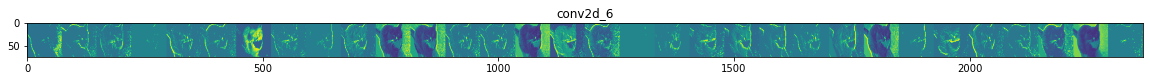

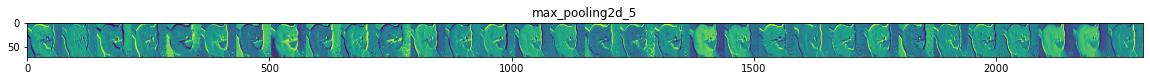

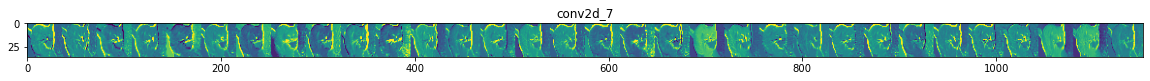

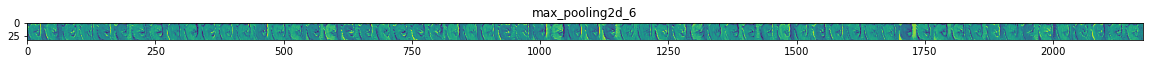

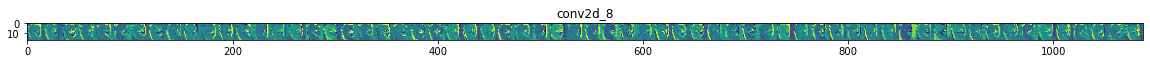

In [22]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Text(0.5, 1.0, 'Training and validation loss')

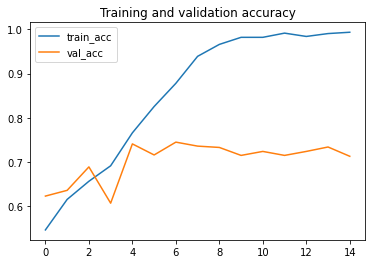

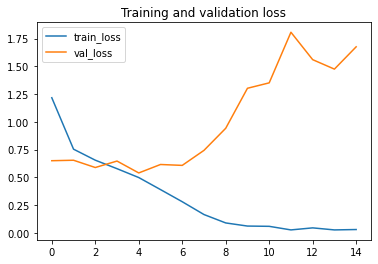

In [36]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc)
plt.plot  ( epochs, val_acc)
plt.legend(['train_acc','val_acc'])
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss)
plt.plot  ( epochs, val_loss )
plt.legend(['train_loss','val_loss'])
plt.title ('Training and validation loss'   )